# Part 1

In this problem we have to use 32 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin).

let’s get our environment ready with the libraries we’ll need and then import the data!

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Check out the Data and append header name to our dataset

In [180]:
f = open('/Users/sadegh/Desktop/CS/field_names.txt').readlines()

In [181]:
f = list(map(str.rstrip, f))

In [182]:
df = pd.read_csv('/Users/sadegh/Desktop/CS/breast-cancer.csv', names = f)

In [183]:
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Clean and prepare data

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

Visualising the missing data in the columns!

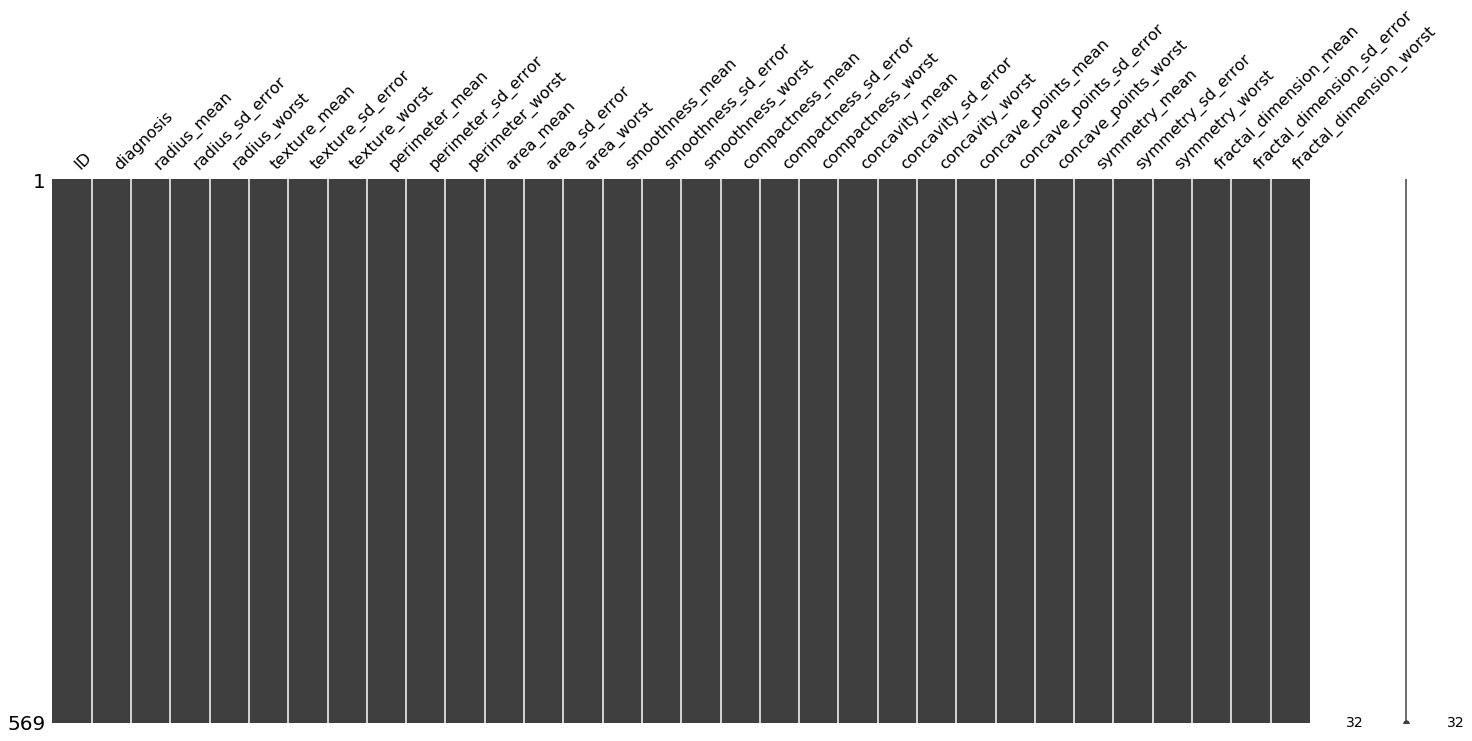

In [185]:
import missingno as msno
msno.matrix(df)

We don't need ID column in our analysis phase. it does not have a positive impact on our result

In [186]:
df.drop('ID',axis=1,inplace=True)

Compute the mean and median smoothness for benign and malignant tumors

In [187]:
df.groupby('diagnosis').smoothness_mean.agg(['count', 'mean', 'median'])

,count,mean,median
diagnosis,,,
B,357,2.000321,1.8510
M,212,4.323929,3.6795


it skews to the left which means that most of the samples are clustering at higher levels of smoothness.

Compute the mean and median compactness for benign and malignant tumors

In [188]:
df.groupby('diagnosis').compactness_mean.agg(['count', 'mean', 'median'])

,count,mean,median
diagnosis,,,
B,357,0.021438,0.01631
M,212,0.032281,0.02859


The same skew showed up with compactness as well.

# EDA

# Corelation Matrix

Corelation Matric can demonstrate the Strength of the relationship between two variables.
Lets look at correlation between all features.

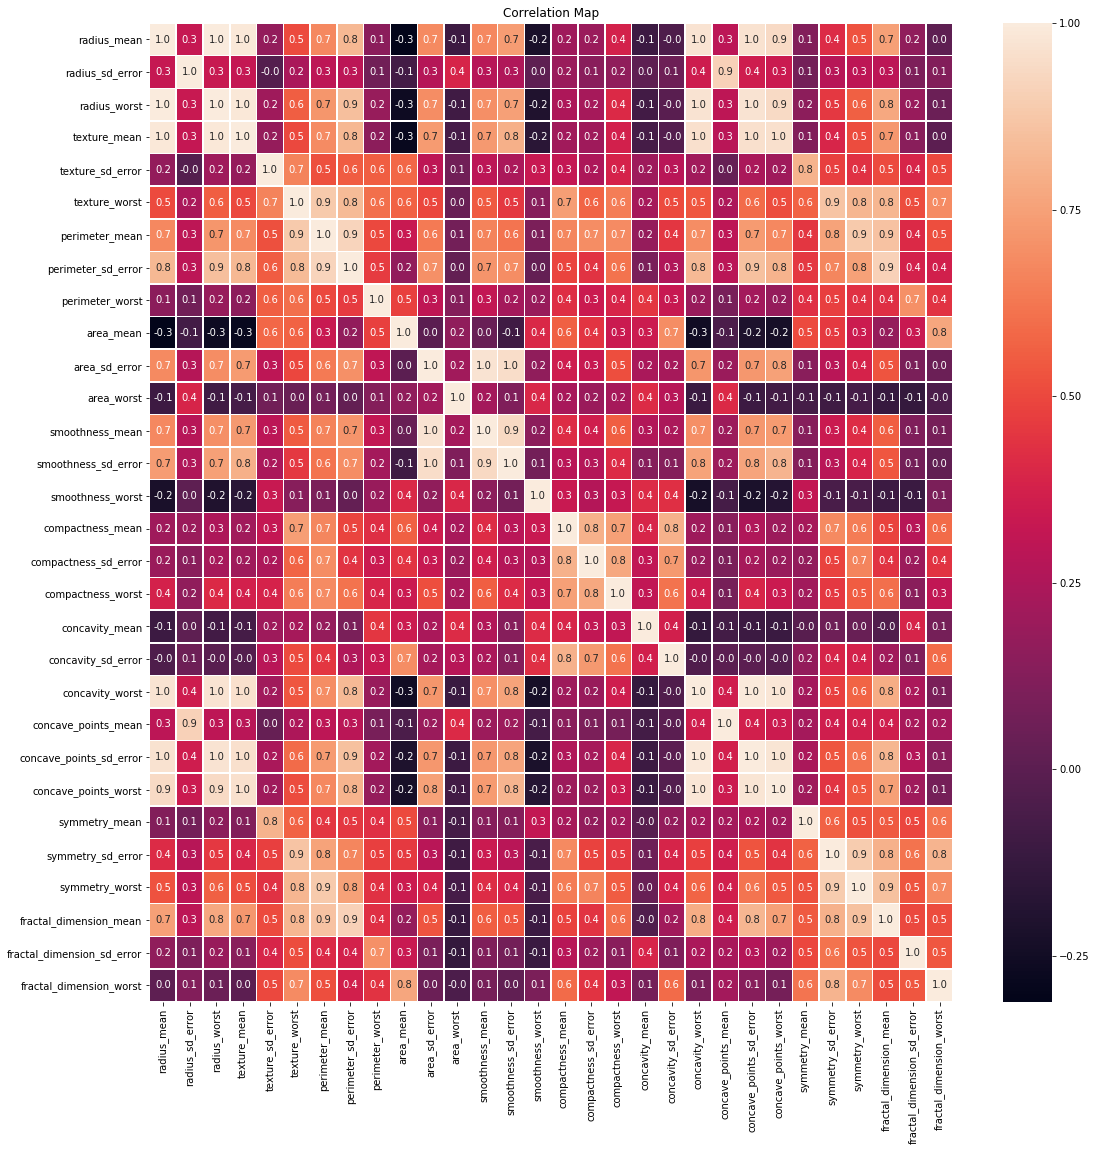

In [133]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [134]:
df.corr()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_sd_error,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_sd_error,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
perimeter_worst,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
area_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


# Data Summary

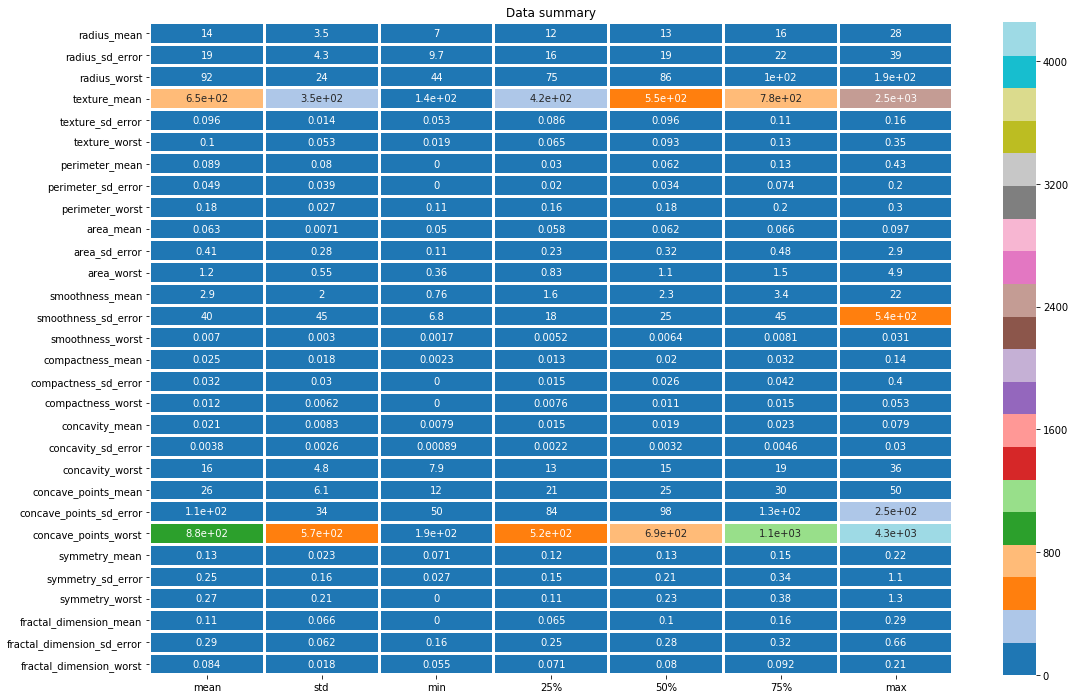

In [135]:
plt.figure(figsize=(18,12))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("tab20"))
plt.title("Data summary")
plt.show()

Percentage of Bening and Malignant in the dataset!

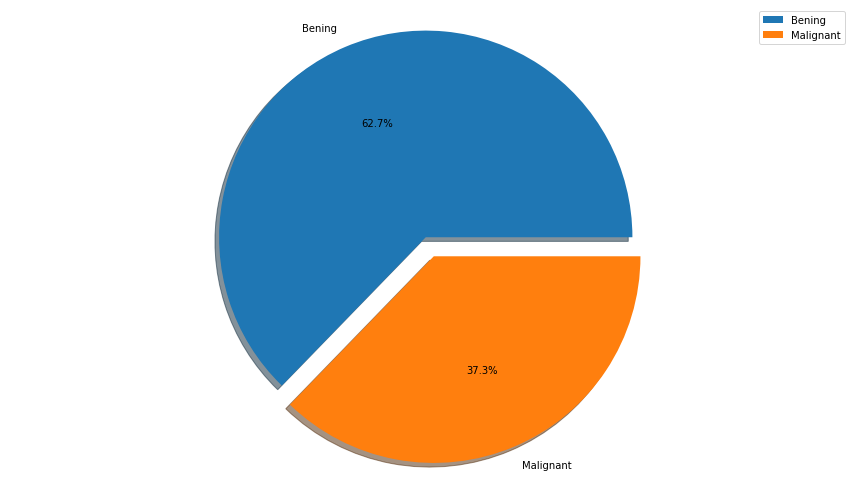

In [136]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['diagnosis'].value_counts(), explode=explode,labels=['Bening','Malignant'], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Frequency of Bening and Malignant in the dataset!

Malignant: 212
Bening: 357


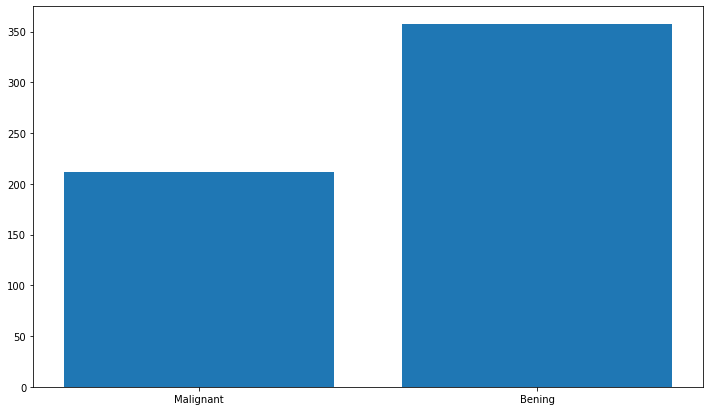

In [137]:
plt.figure(figsize=(12,7))
print('Malignant:',len(df[df.diagnosis == 'M']))
print('Bening:',len(df[df.diagnosis == 'B']))
y = len(df[df.diagnosis == 'M']),len(df[df.diagnosis == 'B'])
x = ['Malignant','Bening']
plt.bar(x,y)
plt.show()

# Histogram

How many times each value appears in dataset. This description is called the distribution of variable

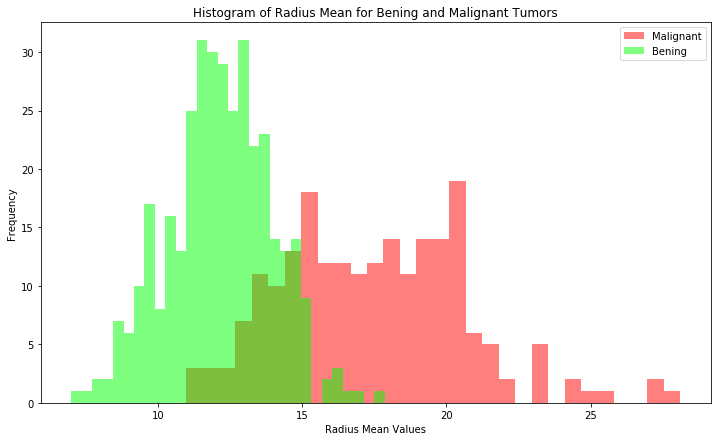

Most frequent malignant radius mean is:  20.101999999999997


In [138]:
plt.figure(figsize=(12,7))
m = plt.hist(df[df["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(df[df["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

# Relationship Between Variables

Scatter Plot is Simplest way to check relationship between two variables.
Lets look at relationship between radius mean and texture_mean

<Figure size 864x504 with 0 Axes>

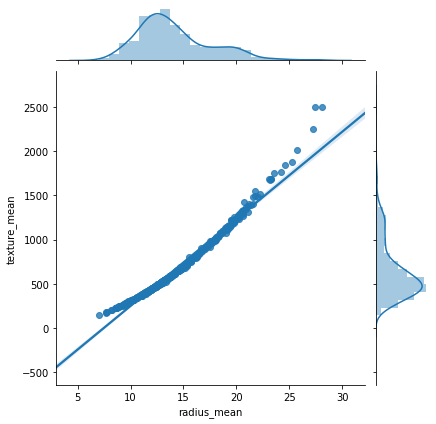

In [139]:
plt.figure(figsize=(12,7))
sns.jointplot(df.radius_mean,df.texture_mean,kind="regg")
plt.show()

In scatter plot you can see that when radius mean increases, texture_mean also increases. Therefore, they are positively correlated with each other.

# Pearson Correlation

Lets look at pearson correlation between radius mean and texture_mean

In [140]:
p1 = df.loc[:,["texture_mean","radius_mean"]].corr(method= "pearson")
p2 = df.radius_mean.cov(df.texture_mean)/(df.radius_mean.std()*df.texture_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
              texture_mean  radius_mean
texture_mean      1.000000     0.987357
radius_mean       0.987357     1.000000
Pearson correlation:  0.9873571700566123


pearson correlation between texture_mean and radius_mean is 0.98 that means that they are positively correlated with each other and relationship between of the is very high.

# Spearman's Rank Correlation

In [141]:
ranked_data = df.rank()
spearman_corr = ranked_data.loc[:,["texture_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
              texture_mean  radius_mean
texture_mean      1.000000     0.999602
radius_mean       0.999602     1.000000


Spearman's correlation is little higher than pearson correlation.
If relationship between distributions are non linear, spearman's correlation tends to better estimate the strength of relationship
Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

Let's take the some columns we'll use for show data means

In [142]:
data_mean= df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
                 'smoothness_mean','compactness_mean','concavity_mean',
                 'symmetry_mean','fractal_dimension_mean']]

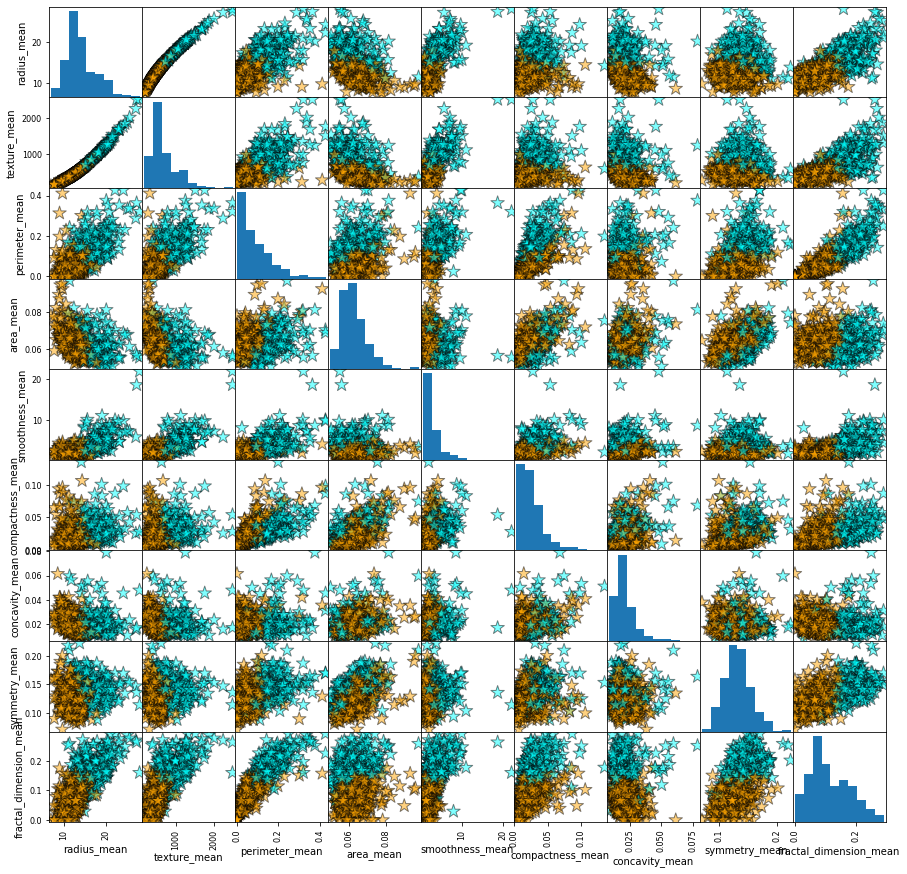

In [143]:
color_list = ['cyan' if i=='M' else 'orange' for i in data_mean.loc[:,'diagnosis']]
pd.plotting.scatter_matrix(data_mean.loc[:, data_mean.columns != 'diagnosis'],
                           c=color_list,
                           figsize= [15,15],
                           diagonal='hist',
                           alpha=0.5,
                           s = 200,
                           marker = '*',
                           edgecolor= "black")
                                        
plt.show()

Let's visualise area_mean and smoothness_mean with scatterplot in order to see the relation between them

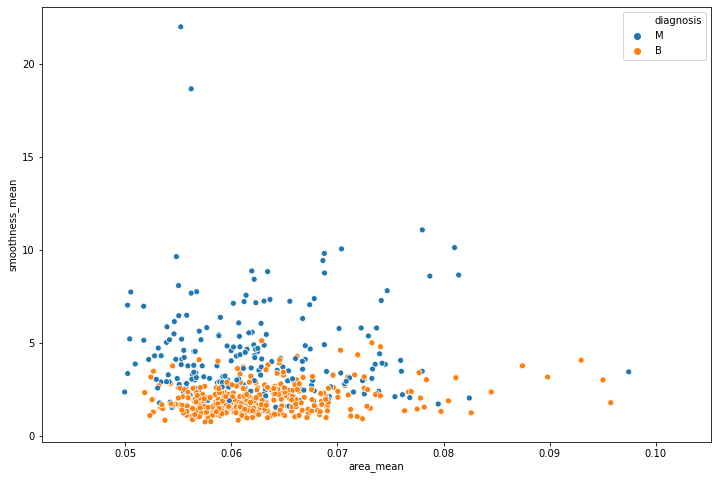

In [144]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df["area_mean"],y=df["smoothness_mean"], hue=df["diagnosis"])

in order to prepare data for modeling phase we need to convert our categorical variables to binary variable

In [145]:
df.diagnosis.replace({"B" : 0, "M" : 1}, inplace = True)

# Training Models

In order to avoid overfitting we need to Split the data into training set and test set. we have dedicated %20 of the data to our test set and %80 to our training set

In [146]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Feature Scalling

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. This method also can reduce the overfitting problem.

# Applying PCA with SVM Model

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy is:  0.9824561403508771


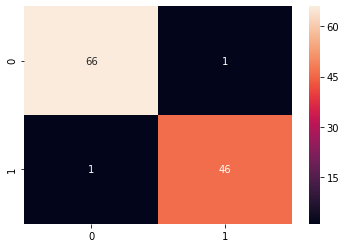

In [149]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

pca = PCA()
clf = svm.SVC(kernel='linear')

pca_svm = make_pipeline(pca, clf)

pca_svm.fit(X_train, y_train)

y_pred = pca_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")
ac_1 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_1)

Accuracy is almost 98% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other machine learning methods to find better results.

# Apply PCA with Naive Bayes Model

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.


              precision    recall  f1-score   support

           0       0.86      0.90      0.88        67
           1       0.84      0.79      0.81        47

    accuracy                           0.85       114
   macro avg       0.85      0.84      0.84       114
weighted avg       0.85      0.85      0.85       114

Accuracy is:  0.8508771929824561


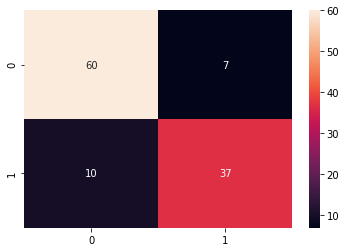

In [150]:
from sklearn.naive_bayes import GaussianNB

pca = PCA()
nb = GaussianNB()

pca_nb = make_pipeline(pca, nb)

pca_nb.fit(X_train, y_train)

y_pred = pca_nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")
ac_2 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_2)

Accuracy is almost 85% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other machine learning methods to find better results.

# Apply PCA with Random Forest Model

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
The fundamental concept behind random forest is a simple but powerful on the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        67
           1       0.95      0.87      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

Accuracy is:  0.9298245614035088


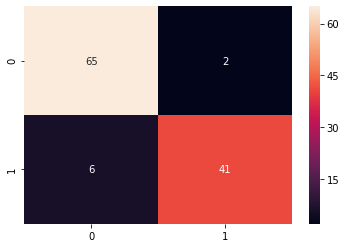

In [151]:
from sklearn.ensemble import RandomForestClassifier


pca = PCA()
rf = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)

pca_rf = make_pipeline(pca, rf)

pca_rf.fit(X_train, y_train)

y_pred = pca_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")
ac_3 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_3)

Accuracy is almost %92 and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other machine learning methods to find better results.

# Apply PCA with Logostic Regression model

Logistic regression is a statistical method for analysing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy is:  0.9649122807017544


/Users/sadegh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


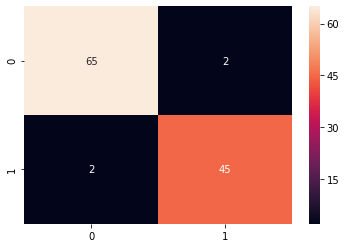

In [152]:
from sklearn.linear_model import LogisticRegression

pca = PCA()
lr = LogisticRegression(random_state=0)

pca_lr = make_pipeline(pca, lr)

pca_lr.fit(X_train, y_train)

y_pred = pca_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")
ac_4 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_4)

Accuracy is almost %96 and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other machine learning methods to find better results.

# Apply PCA with Decision Tree model

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.
A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods.

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        67
           1       0.84      0.91      0.88        47

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114

Accuracy is:  0.8947368421052632


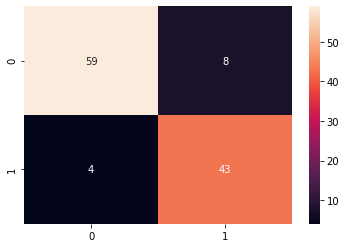

In [153]:
from sklearn.tree import DecisionTreeClassifier

pca = PCA()
dt = DecisionTreeClassifier(criterion='entropy', random_state = 0)

pca_dt = make_pipeline(pca, dt)

pca_dt.fit(X_train, y_train)

y_pred = pca_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm,annot=True,fmt="d")
ac_5 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_5)

Accuracy is almost %89 and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other machine learning methods to find better results.

# Tree Visualisation

sklearn actually has some built-in visualization capabilities for decision trees, you won’t use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [154]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['radius_mean',
 'radius_sd_error',
 'radius_worst',
 'texture_mean',
 'texture_sd_error',
 'texture_worst',
 'perimeter_mean',
 'perimeter_sd_error',
 'perimeter_worst',
 'area_mean',
 'area_sd_error',
 'area_worst',
 'smoothness_mean',
 'smoothness_sd_error',
 'smoothness_worst',
 'compactness_mean',
 'compactness_sd_error',
 'compactness_worst',
 'concavity_mean',
 'concavity_sd_error',
 'concavity_worst',
 'concave_points_mean',
 'concave_points_sd_error',
 'concave_points_worst',
 'symmetry_mean',
 'symmetry_sd_error',
 'symmetry_worst',
 'fractal_dimension_mean',
 'fractal_dimension_sd_error',
 'fractal_dimension_worst']

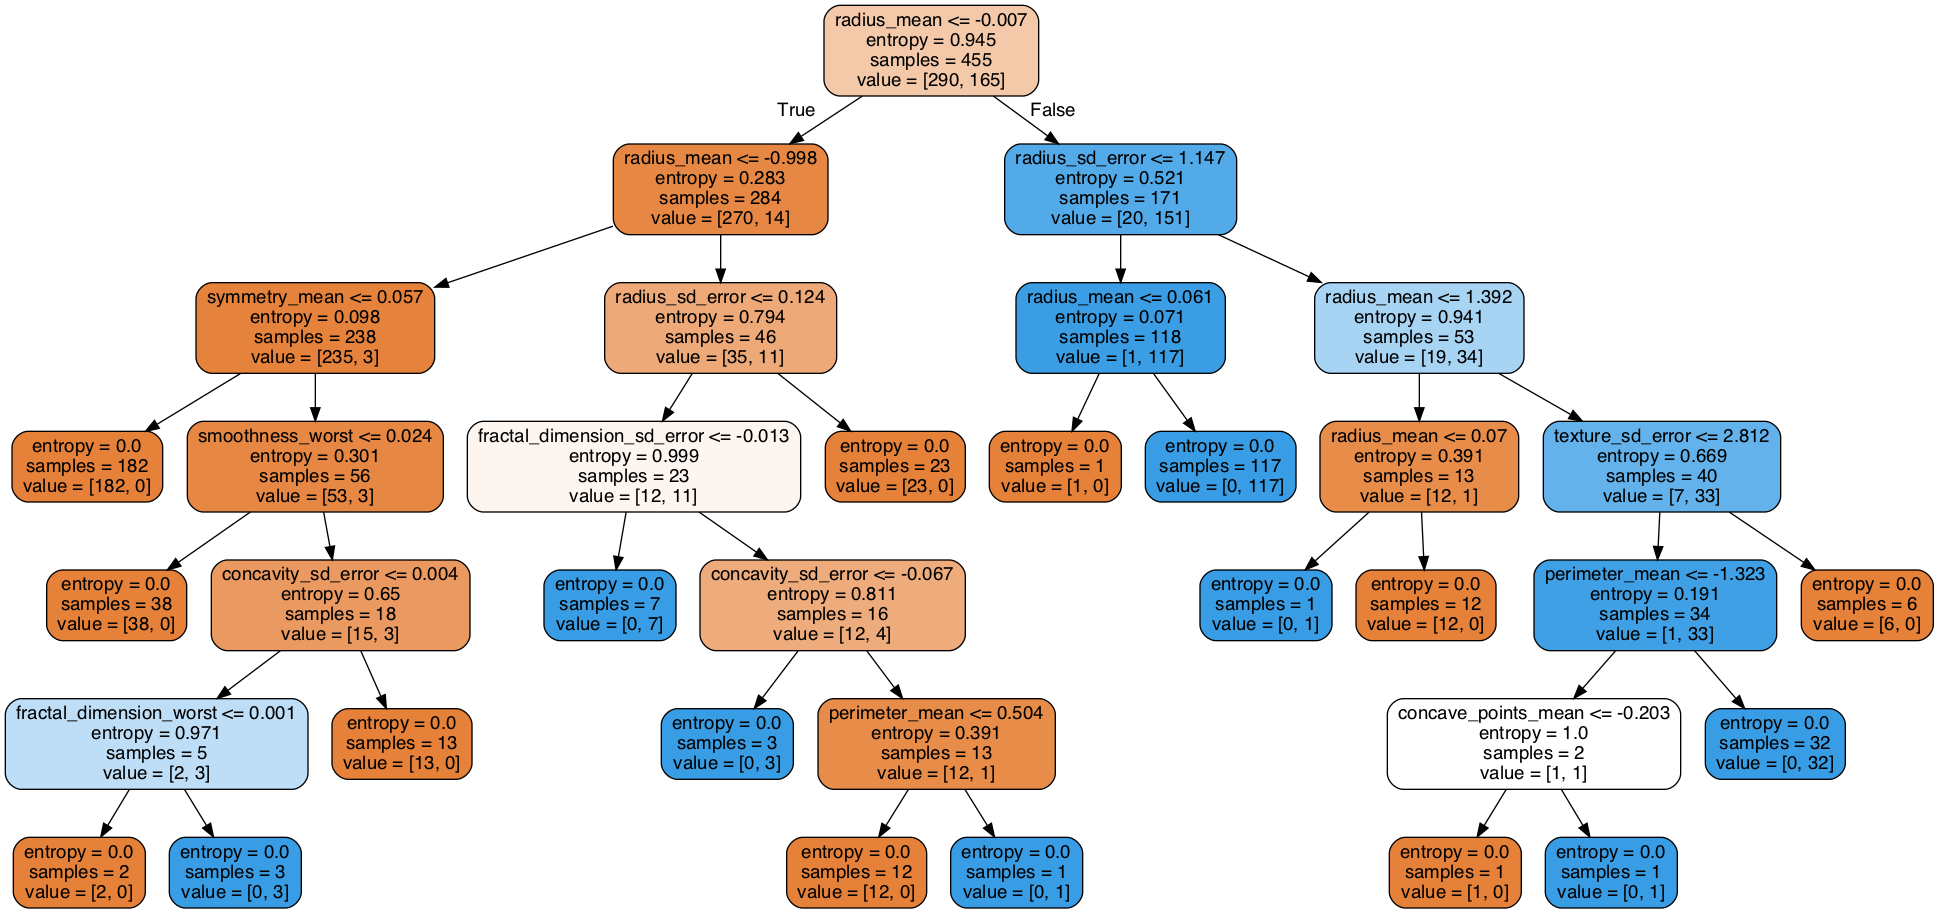

In [155]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

Let's see the performance of machine learning algorithms that we used in this project and compare them based on their accuracy.

In [162]:
score_df = {'Model':['SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'Naive Bayes'], 'Accuracy':[0.98, 0.96, 0.92, 0.89,0.85]}

In [163]:
score_df = pd.DataFrame(score_df, index =['rank1', 'rank2', 'rank3', 'rank4', 'rank5'])

In [164]:
score_df

,Model,Accuracy
rank1,SVM,0.98
rank2,Logistic Regression,0.96
rank3,Random Forest,0.92
rank4,Decision Tree,0.89
rank5,Naive Bayes,0.85


# Explaination

# Technical

In this project, we followed the CRISP-DM methodology which is very popular for data scientist.We have covered all the steps of the CRISP-DM which contained Business Understanding: determine business objectives; assess situation; determine data mining goals; produce project plan. Data Understanding: collect initial data; describe data; explore data; verify data quality. Data Preparation (generally, the most time-consuming phase): select data; clean data; construct data; integrate data; format data. Modeling: select modeling technique; generate test design; build model; assess model .Evaluation: evaluate results; review process; determine next steps. Deployment: plan deployment; plan monitoring and maintenance; produce final report; review project. In this project we have used the correlation methods like Pearson to find out the relationship between two variables. In order to avoid overfitting we devided the data into training set and test set and also used PCA methods.This project campared 5 different type of algorithms and their performance. for the future work we can also use K-fold and artificial neural network and compared the result based on the performance of the Deep Learning algorithms but because of the lack of data we can assume that we will get lower accuracy.

# Non Technical

In this problem we have to use 32 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin). This analysis has been done using different Machine Learning Algorithm with detailed explanation
This is good for beginners. Due to type of target value, we needed to use classification algorithms in order to solve this problem. In this project we demonstarted that radius mean and texture_mean variables are positively correlated with each other using statistical method called Pearson Corelation. We also for modelig covered the popular algorithms in classification methods and compare them to each other. we have noticed that SVM and Logistic Regression had a good performance with 98% and 96% accuracy respectively in this project.